### Importing Liar Dataset from Hugging Face

In [56]:
from datasets import load_dataset
dataset = load_dataset("liar")

Found cached dataset liar (C:/Users/ndl14/.cache/huggingface/datasets/liar/default/1.0.0/479463e757b7991eed50ffa7504d7788d6218631a484442e2098dabbf3b44514)


  0%|          | 0/3 [00:00<?, ?it/s]

#### Importing basic libraries

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Adding data as dataframe using pandas

In [58]:
train_data = dataset['train'].to_pandas()
validation_data = dataset['validation'].to_pandas()
test_data = dataset['test'].to_pandas()

print (train_data.shape)
print (validation_data.shape)
print (test_data.shape)

train_data.columns =['id', 'label', 'statement', 'subject', 'speaker', 'job_title','state_info', 'party_affiliation', 'barely_true_counts', 'false_counts','half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts','context']
validation_data.columns = ['id', 'label', 'statement', 'subject', 'speaker', 'job_title','state_info', 'party_affiliation', 'barely_true_counts', 'false_counts','half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts','context']
test_data.columns = ['id', 'label', 'statement', 'subject', 'speaker', 'job_title','state_info', 'party_affiliation', 'barely_true_counts', 'false_counts','half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts','context']
df = pd.concat([train_data,validation_data,test_data], axis = 0)
#print(train_data.columns)
#print(validation_data.columns)
#print(test_data.columns)


(10269, 14)
(1284, 14)
(1283, 14)


## Creating Co-relation heatmap for Dataframe

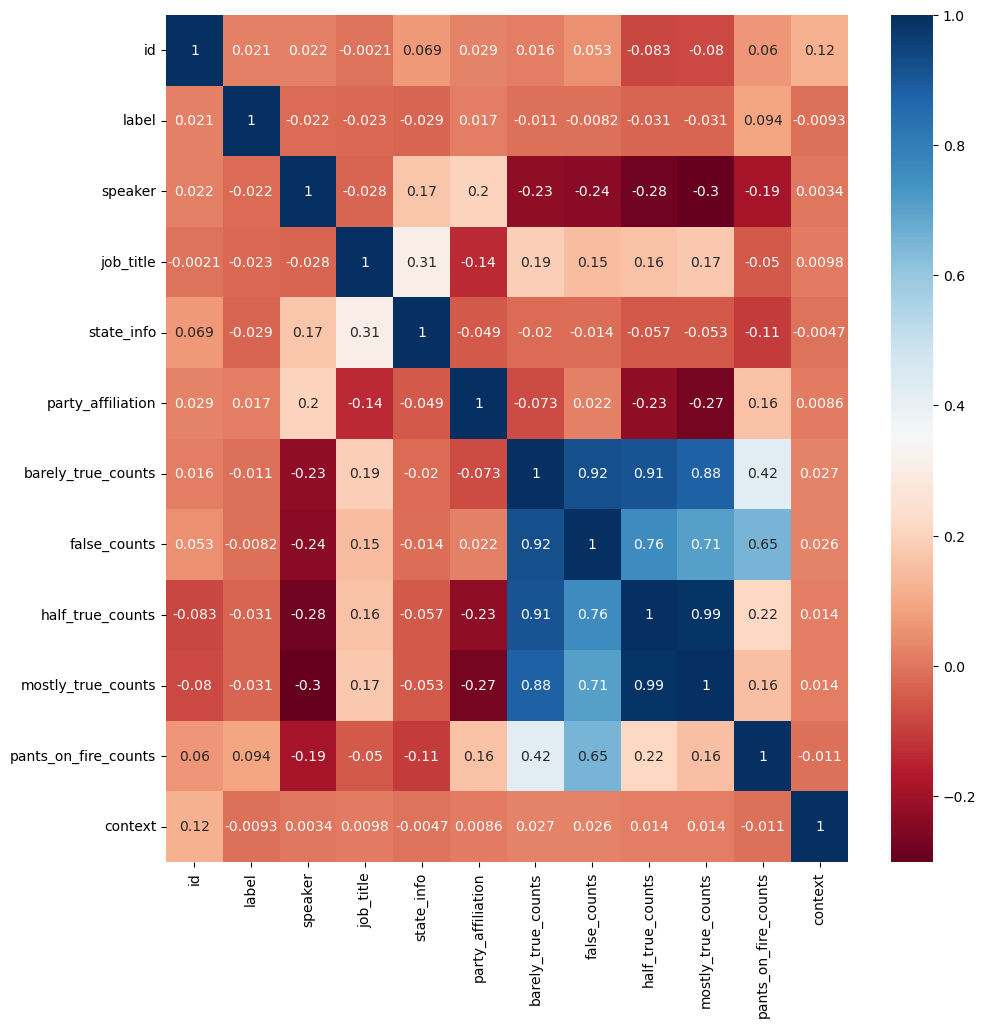

In [59]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()
#print(df_copy.columns)
df_copy.drop(['statement','subject'], axis = 1, inplace = True)
df_copy['id'] = df_copy['id'].apply(lambda x: x[:-5])
df_copy['id'] = df_copy['id'].astype('int64')
le = LabelEncoder()
##df_copy['label'] = le.fit_transform(df_copy['label'])
##df_copy['speaker'] = le.fit_transform(df_copy['speaker'])
##df_copy['job_title'] = le.fit_transform(df_copy['job_title'])
##df_copy['state_info'] = le.fit_transform(df_copy['state_info'])
##df_copy['party_affiliation'] = le.fit_transform(df_copy['party_affiliation'])

# Iterate through each column
for column in df_copy.columns:
    if df_copy[column].dtype == 'object':
        df_copy[column] = le.fit_transform(df_copy[column])

# Now all object columns have been label encoded
#print(df_copy.dtypes)

corr_matrix = df_copy.corr()
plt.figure(figsize=(11,11))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu')
plt.show()

## Creating ScatterPlot for dataframe

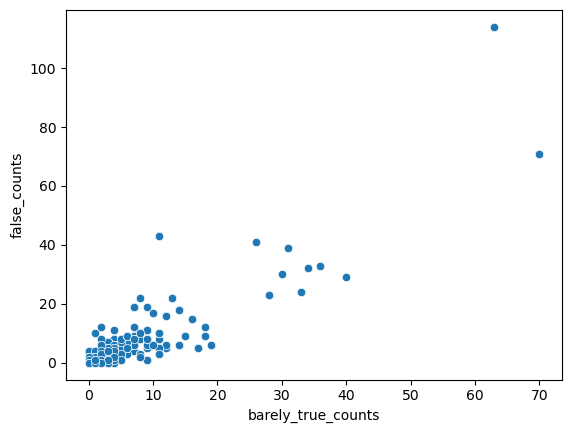

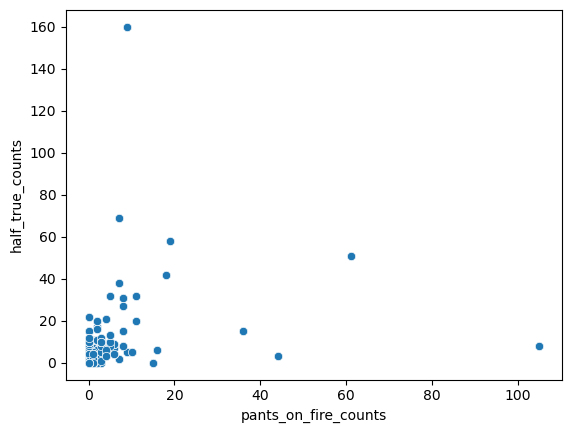

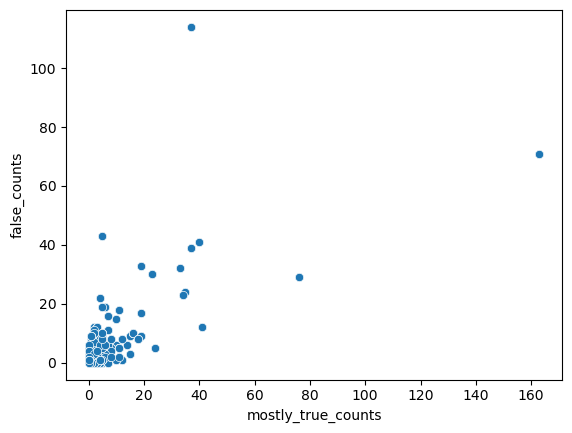

In [60]:
sns.scatterplot(x='barely_true_counts',y='false_counts',data=df_copy)
plt.show()
sns.scatterplot(x='pants_on_fire_counts',y='half_true_counts',data=df_copy)
plt.show()
sns.scatterplot(x='mostly_true_counts',y='false_counts',data=df_copy)
plt.show()

### Dropping Unnecessary Columns

In [61]:
#print(df.columns)
df = df.drop(['id', 'job_title', 'state_info', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context'], axis=1)
df.head()

,label,statement,subject,speaker,party_affiliation
0,0,Says the Annies List political group supports ...,abortion,dwayne-bohac,republican
1,1,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,democrat
2,2,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,democrat
3,0,Health care reform legislation is likely to ma...,health-care,blog-posting,none
4,1,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,democrat


#### Changing liarset label column to support Binary Classification

In [62]:
print(df.label.dtype)
df['label'] = df['label'].map({1: 1, 2: 1, 3: 1, 0: 0, 4: 0, 5: 0})
df.head()

int64


,label,statement,subject,speaker,party_affiliation
0,0,Says the Annies List political group supports ...,abortion,dwayne-bohac,republican
1,1,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,democrat
2,1,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,democrat
3,0,Health care reform legislation is likely to ma...,health-care,blog-posting,none
4,1,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,democrat


In [63]:
df['text'] = df['subject'] + ' ' + df['statement']
df = df.drop(['subject', 'statement'], axis=1)
df.head()

,label,speaker,party_affiliation,text
0,0,dwayne-bohac,republican,abortion Says the Annies List political group ...
1,1,scott-surovell,democrat,"energy,history,job-accomplishments When did th..."
2,1,barack-obama,democrat,foreign-policy Hillary Clinton agrees with Joh...
3,0,blog-posting,none,health-care Health care reform legislation is ...
4,1,charlie-crist,democrat,"economy,jobs The economic turnaround started a..."


In [64]:
print("The shape of dataset is originally: ", df.shape)
print("Number of missing values in each column:")
print(df.isnull().sum())
print("We drop the missing values")
df = df.dropna()
print("The shape of the dataset is now: ", df.shape)

The shape of dataset is originally:  (12836, 4)
Number of missing values in each column:
label                0
speaker              0
party_affiliation    0
text                 0
dtype: int64
We drop the missing values
The shape of the dataset is now:  (12836, 4)


#### Data Cleaning ^

#### Notice that there are no missing values in this dataset ^

In [65]:
df = df.apply(lambda x: x.astype(str).str.lower())
print(df.head())

  label         speaker party_affiliation  \
0     0    dwayne-bohac        republican   
1     1  scott-surovell          democrat   
2     1    barack-obama          democrat   
3     0    blog-posting              none   
4     1   charlie-crist          democrat   

                                                text  
0  abortion says the annies list political group ...  
1  energy,history,job-accomplishments when did th...  
2  foreign-policy hillary clinton agrees with joh...  
3  health-care health care reform legislation is ...  
4  economy,jobs the economic turnaround started a...  


#### Converting dataset to lowercase ^

In [66]:
df['text'] = df['text'].str.replace('[^\w\s,]', '')
df['text'] = df['text'].str.replace('http\S+|www.\S+', '', case=False)
df['text'] = df['text'].str.replace(' ,', ',')
df['text'] = df['text'].str.replace(', ', ',')

#### Removing punctuations except comma, links and extra whitespaces ^

In [67]:
print(df.head())

  label         speaker party_affiliation  \
0     0    dwayne-bohac        republican   
1     1  scott-surovell          democrat   
2     1    barack-obama          democrat   
3     0    blog-posting              none   
4     1   charlie-crist          democrat   

                                                text  
0  abortion says the annies list political group ...  
1  energy,history,job-accomplishments when did th...  
2  foreign-policy hillary clinton agrees with joh...  
3  health-care health care reform legislation is ...  
4  economy,jobs the economic turnaround started a...  


In [68]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
df['text'] = df['text'].apply(lambda x: tokenizer.tokenize(x))
print(df.head())

  label         speaker party_affiliation  \
0     0    dwayne-bohac        republican   
1     1  scott-surovell          democrat   
2     1    barack-obama          democrat   
3     0    blog-posting              none   
4     1   charlie-crist          democrat   

                                                text  
0  [abortion, says, the, annies, list, political,...  
1  [energy, history, job, accomplishments, when, ...  
2  [foreign, policy, hillary, clinton, agrees, wi...  
3  [health, care, health, care, reform, legislati...  
4  [economy, jobs, the, economic, turnaround, sta...  


#### Tokenization of data ^

In [69]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
print(df.head())

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ndl14\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


  label         speaker party_affiliation  \
0     0    dwayne-bohac        republican   
1     1  scott-surovell          democrat   
2     1    barack-obama          democrat   
3     0    blog-posting              none   
4     1   charlie-crist          democrat   

                                                text  
0  [abortion, say, the, annies, list, political, ...  
1  [energy, history, job, accomplishment, when, d...  
2  [foreign, policy, hillary, clinton, agrees, wi...  
3  [health, care, health, care, reform, legislati...  
4  [economy, job, the, economic, turnaround, star...  


#### Lemmatization of data ^

In [70]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: [item for item in x if item not in stop])
print(df.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ndl14\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  label         speaker party_affiliation  \
0     0    dwayne-bohac        republican   
1     1  scott-surovell          democrat   
2     1    barack-obama          democrat   
3     0    blog-posting              none   
4     1   charlie-crist          democrat   

                                                text  
0  [abortion, say, annies, list, political, group...  
1  [energy, history, job, accomplishment, decline...  
2  [foreign, policy, hillary, clinton, agrees, jo...  
3  [health, care, health, care, reform, legislati...  
4  [economy, job, economic, turnaround, started, ...  


#### Stop words removal from Text Column ^

In [71]:
df['text'] = df['text'].apply(lambda x: ' '.join(x))
df['text'].head()

0    abortion say annies list political group suppo...
1    energy history job accomplishment decline coal...
2    foreign policy hillary clinton agrees john mcc...
3    health care health care reform legislation lik...
4     economy job economic turnaround started end term
Name: text, dtype: object

#### Joining Text Column into string for Vectorization ^

In [72]:
!pip install wordcloud

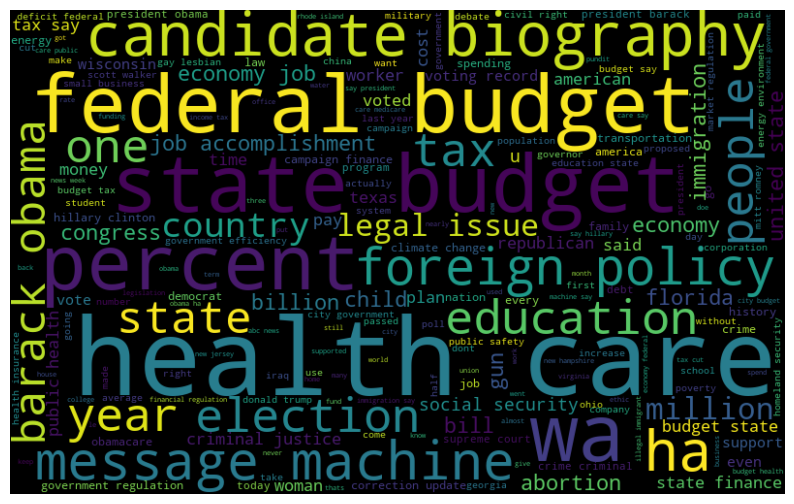

In [73]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in df['text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Visualisation of Data ^

In [74]:
def to_vector_Tfidf(df, col):
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer(max_features=2000)
    vectorizer.fit(df[col])
    return vectorizer.transform(df[col])

def to_vector_bow(df, col):
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer(max_features=2000)
    vectorizer.fit(df[col])
    return vectorizer.transform(df[col])


#### Using TfIdf and BoW for vectorisation ^

In [75]:
print("Original Shape: ", df.shape)
text_vector_tfidf = to_vector_Tfidf(df, 'text')
print("Shape of the tfidf vector: ", text_vector_tfidf.shape)
print(text_vector_tfidf.shape)
text_vector_bow = to_vector_bow(df, 'text')
print("Shape of the text vector for bow vectorization: ", text_vector_bow.shape)
print(text_vector_bow.shape)

Original Shape:  (12836, 4)
Shape of the tfidf vector:  (12836, 2000)
(12836, 2000)
Shape of the text vector for bow vectorization:  (12836, 2000)
(12836, 2000)


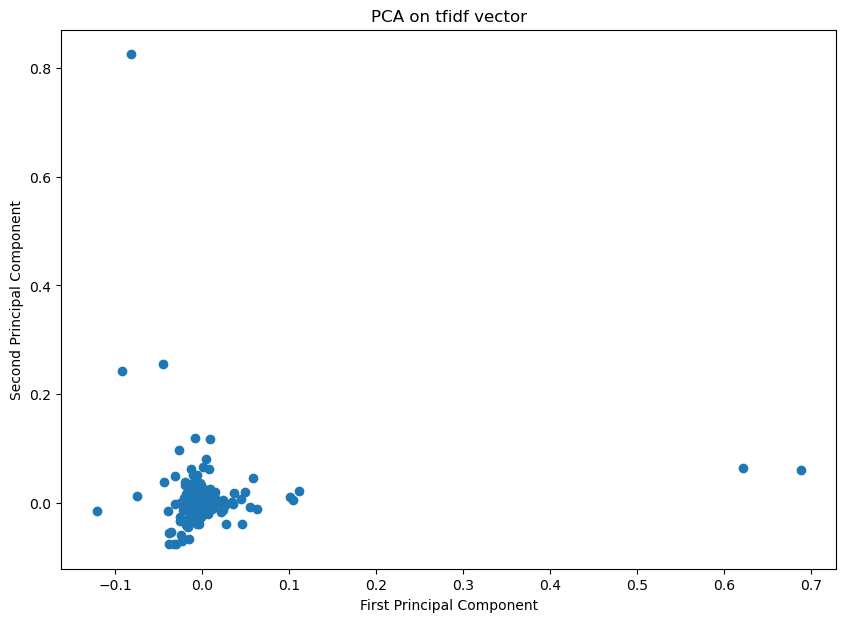

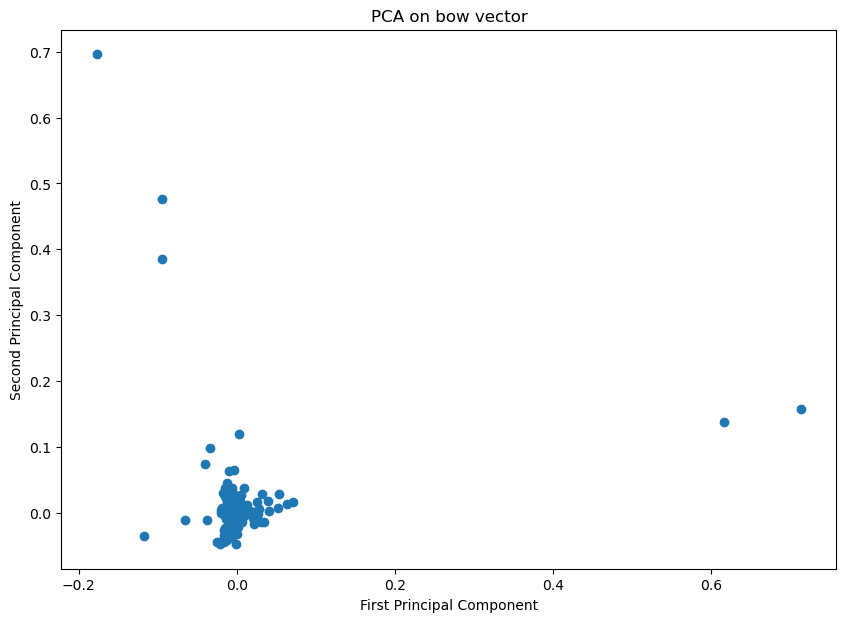

In [76]:
text_vector_tfidf_copy=text_vector_tfidf.copy()
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(text_vector_tfidf_copy.toarray())
plt.figure(figsize=(10, 7))
plt.scatter(pca.components_[0], pca.components_[1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA on tfidf vector')
plt.show()

text_vector_bow_copy=text_vector_bow.copy()
pca = PCA(n_components=2)
pca.fit_transform(text_vector_bow_copy.toarray())
plt.figure(figsize=(10, 7))
plt.scatter(pca.components_[0], pca.components_[1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA on bow vector')
plt.show()

## PCA ^

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 12836 samples in 0.027s...
[t-SNE] Computed neighbors for 12836 samples in 4.810s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12836
[t-SNE] Computed conditional probabilities for sample 2000 / 12836
[t-SNE] Computed conditional probabilities for sample 3000 / 12836
[t-SNE] Computed conditional probabilities for sample 4000 / 12836
[t-SNE] Computed conditional probabilities for sample 5000 / 12836
[t-SNE] Computed conditional probabilities for sample 6000 / 12836
[t-SNE] Computed conditional probabilities for sample 7000 / 12836
[t-SNE] Computed conditional probabilities for sample 8000 / 12836
[t-SNE] Computed conditional probabilities for sample 9000 / 12836
[t-SNE] Computed conditional probabilities for sample 10000 / 12836
[t-SNE] Computed conditional probabilities for sample 11000 / 12836
[t-SNE] Computed conditional probabilities for sample 12000 / 12836
[t-SNE] Computed conditional probabilities for sa

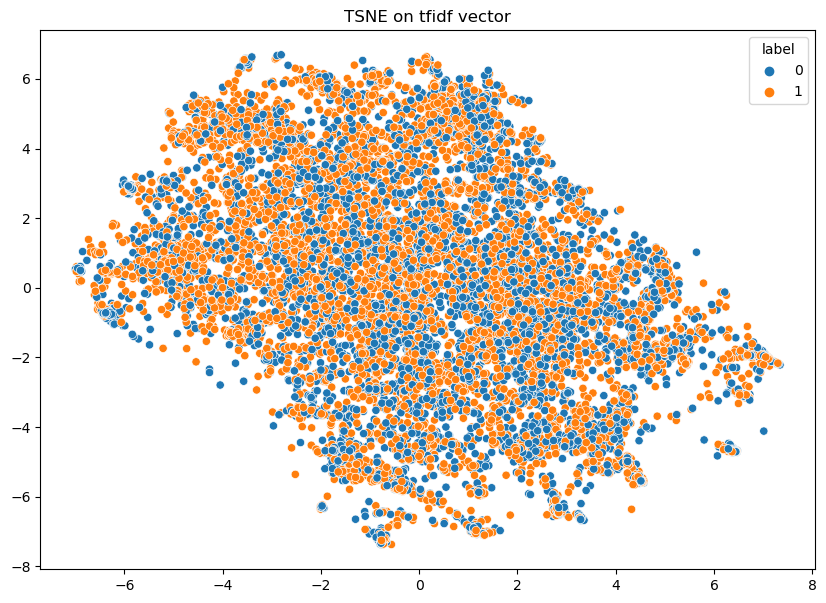

In [77]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_text_vector_tfidf_tsne_copy=text_vector_tfidf.copy()
tsne_text_vector_tfidf_tsne_copy = tsne.fit_transform(tsne_text_vector_tfidf_tsne_copy.toarray())
plt.figure(figsize=(10, 7))
import seaborn as sns
sns.scatterplot(x=tsne_text_vector_tfidf_tsne_copy[:,0], y=tsne_text_vector_tfidf_tsne_copy[:,1], hue=df['label'])
plt.title('TSNE on tfidf vector')
plt.show()

## TSNE Done Here ^

In [78]:
text_vector_tfidf = text_vector_tfidf.toarray()
text_vector_bow = text_vector_bow.toarray()
df['party_affiliation'].head()

0    republican
1      democrat
2      democrat
3          none
4      democrat
Name: party_affiliation, dtype: object

In [79]:
label_vector = df['label'].values
speaker_vector = df['speaker'].values
party_vector = df['party_affiliation'].values
label_vector = label_vector.reshape(-1, 1)
speaker_vector = speaker_vector.reshape(-1, 1)
party_vector = party_vector.reshape(-1, 1)

In [81]:
import numpy as np
dataF1 = np.concatenate((text_vector_tfidf, label_vector), axis=1)
dataF2 = np.concatenate((text_vector_bow, label_vector), axis=1)
dataF3 = np.concatenate((text_vector_tfidf, label_vector, speaker_vector, party_vector), axis=1)
dataF4 = np.concatenate((text_vector_bow, label_vector, speaker_vector, party_vector), axis=1)
print(dataF1.shape)
print(dataF2.shape)
print(dataF3.shape)
print(dataF4.shape)

(12836, 2001)
(12836, 2001)
(12836, 2003)
(12836, 2003)


In [82]:
dataF1=pd.DataFrame(dataF1)
dataF2=pd.DataFrame(dataF2)
dataF3=pd.DataFrame(dataF3)
dataF4=pd.DataFrame(dataF4)
print(dataF1.head())

  0    1    2    3    4    5    6    7    8    9     ... 1991 1992 1993 1994  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

  1995 1996 1997 1998 1999 2000  
0  0.0  0.0  0.0  0.0  0.0    0  
1  0.0  0.0  0.0  0.0  0.0    1  
2  0.0  0.0  0.0  0.0  0.0    1  
3  0.0  0.0  0.0  0.0  0.0    0  
4  0.0  0.0  0.0  0.0  0.0    1  

[5 rows x 2001 columns]


In [83]:
for i in range(2000):
    dataF1.rename(columns={i: 'tfidf'+str(i)}, inplace=True)
    dataF2.rename(columns={i: 'bow'+str(i)}, inplace=True)
    dataF3.rename(columns={i: 'tfidf'+str(i)}, inplace=True)
    dataF4.rename(columns={i: 'bow'+str(i)}, inplace=True)
dataF1.rename(columns={2000: 'label'}, inplace=True)
dataF2.rename(columns={2000: 'label'}, inplace=True)
dataF3.rename(columns={2000: 'label'}, inplace=True)
dataF4.rename(columns={2000: 'label'}, inplace=True)
dataF3.rename(columns={2001: 'speaker'}, inplace=True)
dataF4.rename(columns={2001: 'speaker'}, inplace=True)
dataF3.rename(columns={2002: 'party'}, inplace=True)
dataF4.rename(columns={2002: 'party'}, inplace=True)

In [84]:
from sklearn.preprocessing import LabelEncoder
le3=LabelEncoder()
le4=LabelEncoder()
dataF3['speaker']=le3.fit_transform(dataF3['speaker'])
dataF4['speaker']=le4.fit_transform(dataF4['speaker'])
dataF3['party']=le3.fit_transform(dataF3['party'])
dataF4['party']=le4.fit_transform(dataF4['party'])

### Label Encoding Performed here ^